In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import io
data = files.upload()

Saving New Microsoft Office Excel Worksheet.csv to New Microsoft Office Excel Worksheet.csv


In [ ]:
df = pd.read_csv(io.StringIO(data['New Microsoft Office Excel Worksheet.csv'].decode('utf-8')))

In [ ]:
df.head

<bound method NDFrame.head of     R&D Spend  Administration  Marketing Spend     Profit
0   165349.20       136897.80        471784.10  192261.83
1   162597.70       151377.59        443898.53  191792.06
2   153441.51       101145.55        407934.54  191050.39
3   144372.41       118671.85        383199.62  182901.99
4   142107.34        91391.77        366168.42  166187.94
5   131876.90        99814.71        362861.36  156991.12
6   134615.46       147198.87        127716.82  156122.51
7   130298.13       145530.06        323876.68  155752.60
8   120542.52       148718.95        311613.29  152211.77
9   123334.88       108679.17        304981.62  149759.96
10  101913.08       110594.11        229160.95  146121.95
11  100671.96        91790.61        249744.55  144259.40
12   93863.75       127320.38        249839.44  141585.52
13   91992.39       135495.07        252664.93  134307.35
14  119943.24       156547.42        256512.92  132602.65
15  114523.61       122616.84        26177

In [ ]:
plt.rcParams['figure.figsize'] = (15,6)

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [ ]:
correlation = df.corr()
correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
df.corr()['Profit'].sort_values().to_frame()

,Profit
Administration,0.200717
Marketing Spend,0.747766
R&D Spend,0.972900
Profit,1.000000


<Axes: >

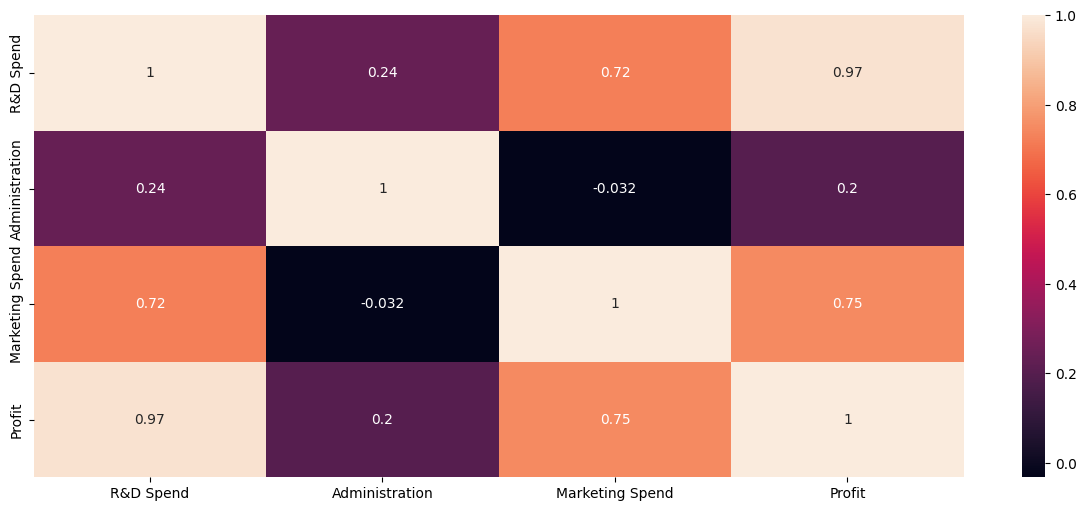

In [ ]:
sns.heatmap(correlation, annot=True)

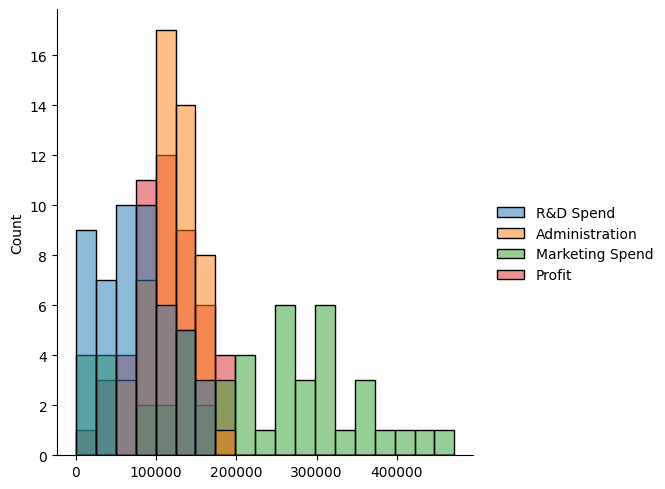

In [ ]:
sns.displot(df)

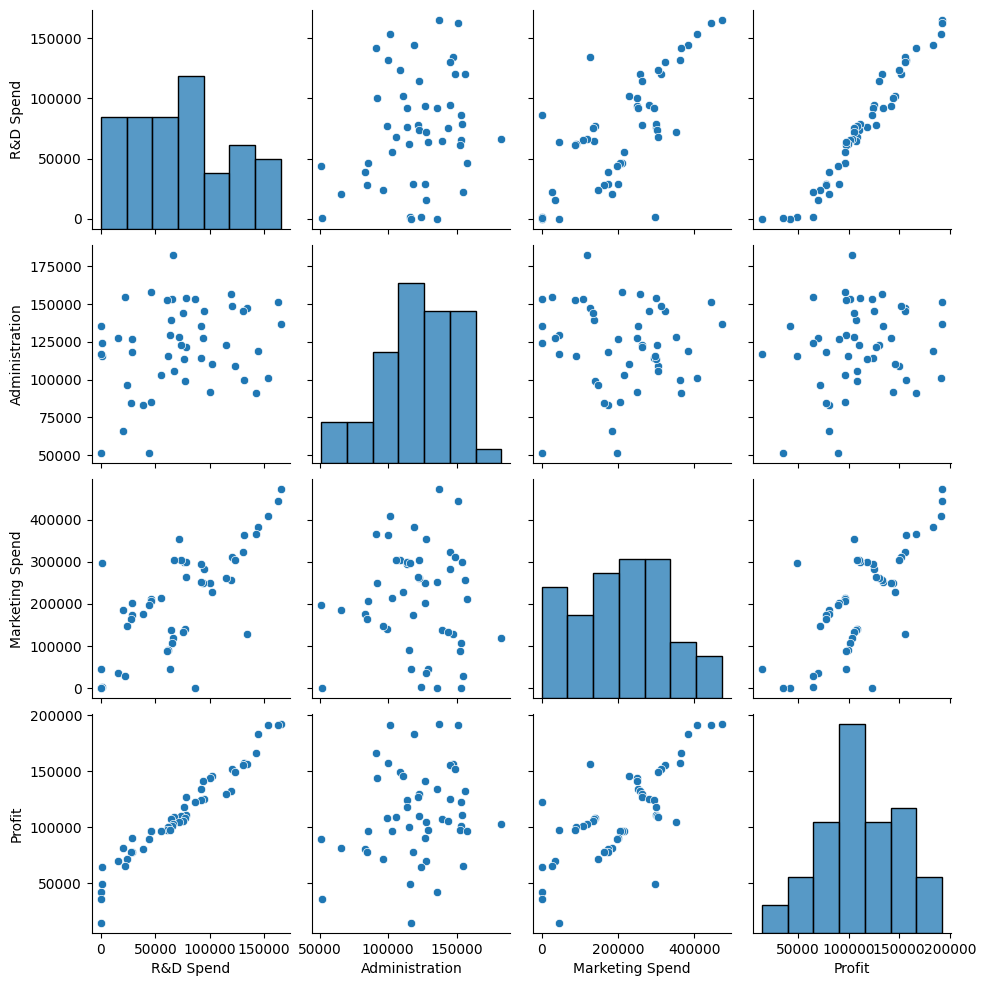

In [ ]:
sns.pairplot(df)

In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [ ]:
x = df[['R&D Spend' , 'Administration' , 'Marketing Spend']].values 
y = df[['Profit']].values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[3])], remainder='passthrough')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_model = lin_reg.fit(x_train, y_train)

In [ ]:
y_pred = lin_model.predict(x_test)
np.set_printoptions(precision=2)
print(y_pred)

[[103901.9 ]
 [132763.06]
 [133567.9 ]
 [ 72911.79]
 [179627.93]
 [115166.65]
 [ 67113.58]
 [ 98154.81]
 [114756.12]
 [169064.01]]


In [ ]:
compare = np.concatenate((y_pred, y_test), axis=1)
df_compare = pd. DataFrame(compare, columns=['y_pred', 'y_test'])
df_compare

,y_pred,y_test
0,103901.896970,103282.38
1,132763.059931,144259.40
2,133567.903700,146121.95
3,72911.789767,77798.83
4,179627.925672,191050.39
5,115166.648648,105008.31
6,67113.576906,81229.06
7,98154.806868,97483.56
8,114756.115552,110352.25
9,169064.014088,166187.94


In [ ]:
print("These are the values of model coeficients : ", lin_model.coef_)
print("This is the intercept model : ", lin_model.intercept_)

These are the values of model coeficients :  [[0.78 0.03 0.03]]
This is the intercept model :  [42989.01]


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("This is the value of R^2 : ", R2 * 100.00, "%")

This is the value of R^2 :  93.9395591782057 %


In [ ]:
print(lin_model.predict([[1, 0, 0, ]]))

[[42989.79]]
